In [ ]:
%%capture
!pip install super-gradients==3.1.0
!pip install imutils
!pip install roboflow
!pip install pytube --upgrade

In [ ]:
!pip install torchinfo

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install super-_gradients==3.1.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached pyparsing-2.4.5-py2.py3-none-any.whl (67 kB)
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 2.4.7
    Uninstalling pyparsing-2.4.7:
      Successfully uninstalled pyparsing-2.4.7
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
roboflow 1.0.9 requires pyparsing==2.4.7, but you have pyparsing 2.4.5 which is incompatible.


In [ ]:
from super_gradients.training import models

The console stream is logged into /root/sg_logs/console.log


[2023-06-17 09:03:47] INFO - crash_tips_setup.py - Crash tips is enabled. You can set your environment variable to CRASH_HANDLER=FALSE to disable it
/usr/local/lib/python3.10/dist-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")
[2023-06-17 09:03:58] WARNING - __init__.py - Failed to import pytorch_quantization
[2023-06-17 09:03:58] WARNING - calibrator.py - Failed to import pytorch_quantization
[2023-06-17 09:03:58] WARNING - export.py - Failed to import pytorch_quantization
[2023-06-17 09:03:58] WARNING - selective_quantization_utils.py - Failed to import pytorch_quantization


In [ ]:
from torchinfo import summary
#for printing yolo-nas model architecture summary


In [ ]:

yolo_nas_l=models.get("yolo_nas_l",pretrained_weights="coco")

[2023-06-17 09:04:01] INFO - checkpoint_utils.py - License Notification: YOLO-NAS pre-trained weights are subjected to the specific license terms and conditions detailed in 
https://github.com/Deci-AI/super-gradients/blob/master/LICENSE.YOLONAS.md
By downloading the pre-trained weight files you agree to comply with these terms.


In [ ]:
#printing model summary
summary(model=yolo_nas_l,
        input_size=(16,3,640,640),
        col_names=["input_size","output_size","num_params","trainable"],
        col_width=20,
        row_settings=["var_names"]
        )

Layer (type (var_name))                                           Input Shape          Output Shape         Param #              Trainable
YoloNAS_L (YoloNAS_L)                                             [16, 3, 640, 640]    [16, 8400, 4]        --                   True
├─NStageBackbone (backbone)                                       [16, 3, 640, 640]    [16, 96, 160, 160]   --                   True
│    └─YoloNASStem (stem)                                         [16, 3, 640, 640]    [16, 48, 320, 320]   --                   True
│    │    └─QARepVGGBlock (conv)                                  [16, 3, 640, 640]    [16, 48, 320, 320]   3,024                True
│    └─YoloNASStage (stage1)                                      [16, 48, 320, 320]   [16, 96, 160, 160]   --                   True
│    │    └─QARepVGGBlock (downsample)                            [16, 48, 320, 320]   [16, 96, 160, 160]   88,128               True
│    │    └─YoloNASCSPLayer (blocks)                     


**what is tensor and tensor input?**
In the above given code, the term "tensor" is used to refer to a multi-dimensional array of numbers. In this case, the tensor is used to represent the input image to the YOLO model. The tensor has a shape of (16, 3, 640, 640), which means that it has 16 batches, 3 channels, 640 rows, and 640 columns. Each element in the tensor represents a pixel value in the input image.

The YOLO model uses the tensor to predict the bounding boxes and confidence scores for objects in the image. The model does this by passing the tensor through a series of layers, each of which performs a different mathematical operation on the data. The final layer of the model outputs a tensor of shape (1, 3, 192, 192), which represents the predicted bounding boxes and confidence scores for each object in the image.

The tensor in the above given code is an important part of the YOLO model. It is used to represent the input image and to store the predicted bounding boxes and confidence scores for objects in the image.

**explainig in details all parameter of summary?**
The shape (1,3,192,192) stands for a tensor with 1 batch, 3 channels, 192 rows, and 192 columns. In the context of the YOLO model, this tensor represents the output of the model, which is a set of predicted bounding boxes and confidence scores for each object in the image.

The batch size is the number of images that are processed at once. In this case, there is only 1 image in the batch.
The number of channels is the number of different types of data that are represented in the tensor. In this case, there are 3 channels, which represent the red, green, and blue channels of the image.
The height and width of the tensor represent the size of the image. In this case, the image is 192 pixels high and 192 pixels wide.
The predicted bounding boxes and confidence scores are stored in the tensor as a series of 5 values for each object in the image. The values are:

The top left corner of the bounding box, as a fraction of the width and height of the image.
The bottom right corner of the bounding box, as a fraction of the width and height of the image.
The confidence score for the object.
The class ID for the object.
The probability that the object belongs to the class.
The YOLO model uses these values to identify and classify objects in images.

**row settings:**
he row_settings parameter in the summary() function specifies the settings for each row in the summary. In this case, the var_names setting specifies that the variable names should be printed for each row.

## ***inference with yolo-nas***

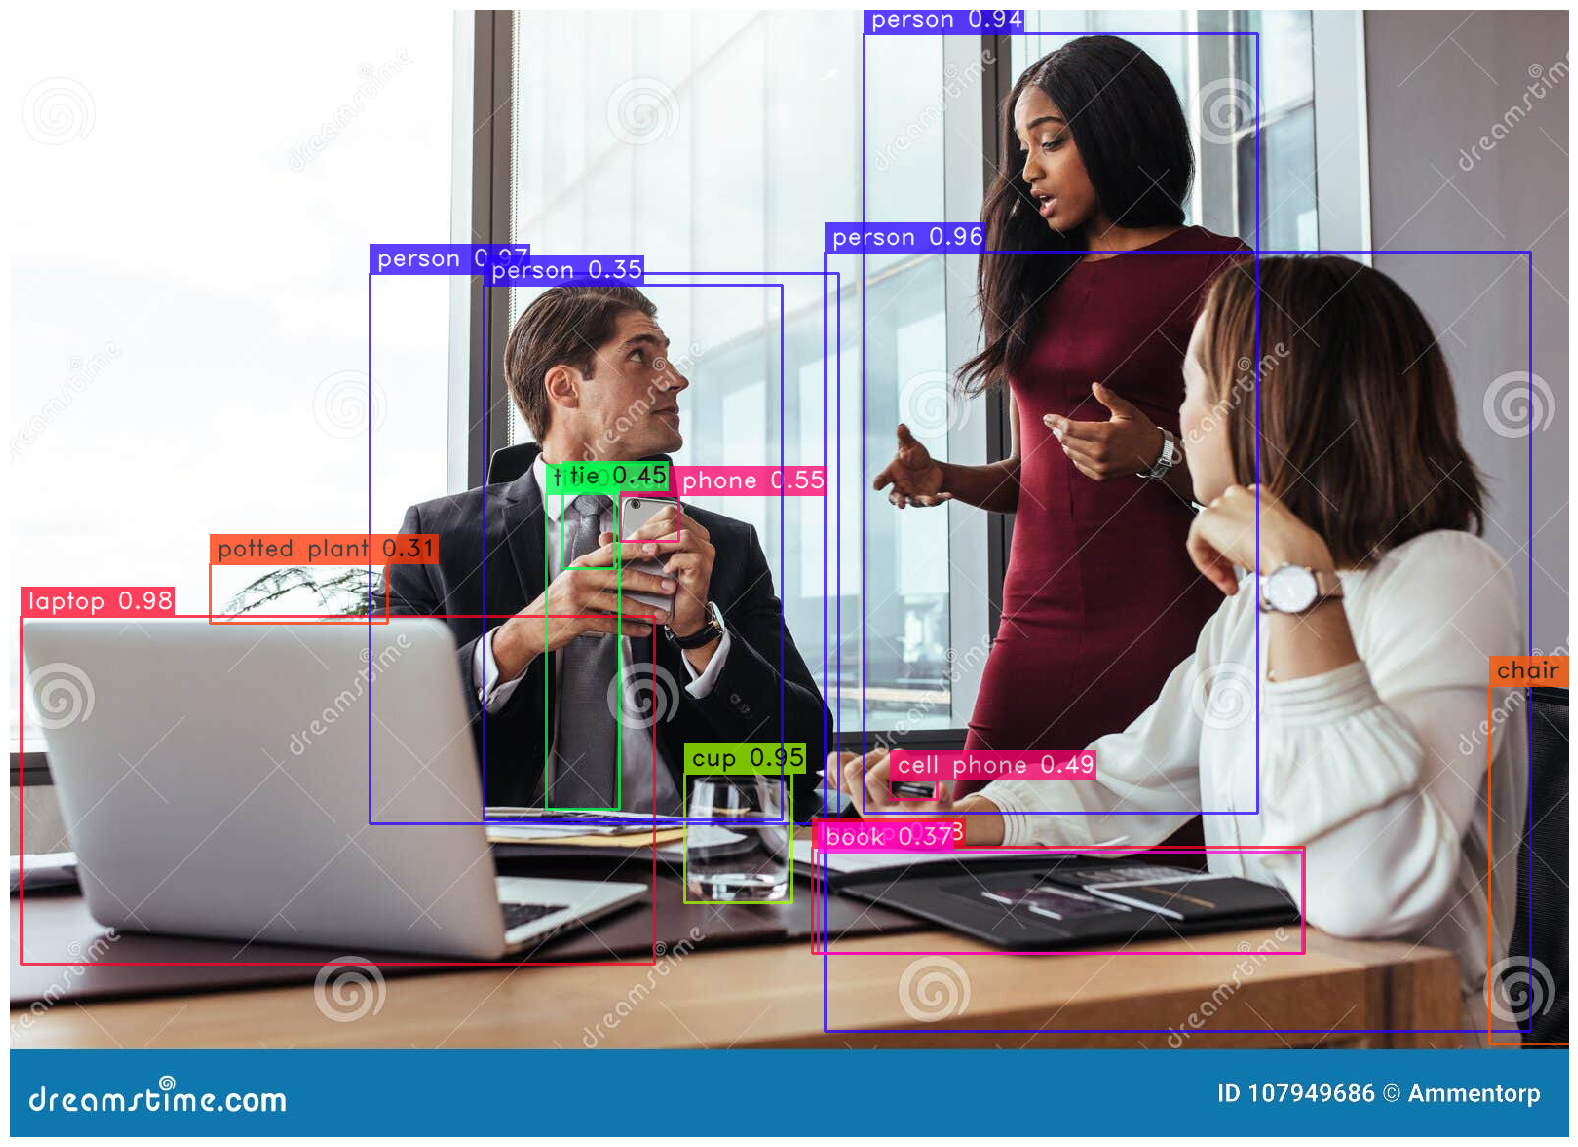

In [ ]:
link="https://thumbs.dreamstime.com/z/business-professionals-working-together-new-project-team-three-planning-work-office-female-colleague-explaining-her-107949686.jpg"
yolo_nas_l.predict(link,conf=0.30).show()

In [ ]:
!gdown="/content/drive/MyDrive/Delhi/IMG-20190804-WA0036.jpg"

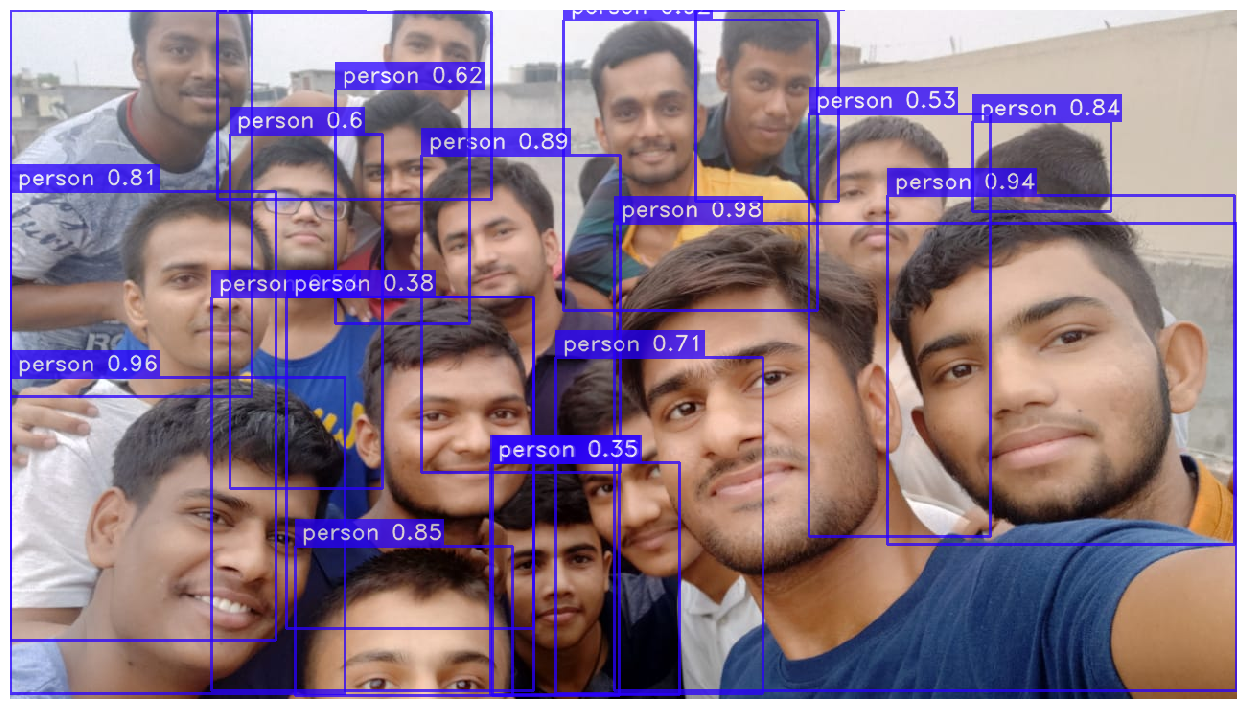

In [ ]:
image ="/content/drive/MyDrive/Delhi/IMG-20190804-WA0035.jpg"
yolo_nas_l.predict(image,conf=0.30).show()

In [ ]:
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"

In [ ]:
input_video="/content/whatsapp-video-2022-09-17-at-105120-pm-online-video-cuttercom_Uj4RWoVP.mp4"
output_video="detection.mp4"

In [ ]:
yolo_nas_l.to(device).predict(input_video).save(output_video)

Predicting Video: 100%|██████████| 318/318 [00:15<00:00, 21.14it/s]
